# Sentiment Analysis by `Mr. Harshit Dawar!`

* It is a way to identify the sentiments of the persons using the comments/reviews of the users.
* It can be performed using multiple libraries, but obviously the basic logic remains the same as always.
* In this practical, Twitter Dataset of 1.6 Million Tweets is used to perform the sentiment analysis using the review/tweet.

In [1]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import spacy

In [2]:
# Loading the Dataset
tweets = pd.read_csv("dataset.csv",
                     encoding = "latin1",
                     header = None,
                     names = ['sentiment', 'id', 'date', 'query', 'user', 'text'])

In [3]:
tweets.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
tweets.shape

(1600000, 6)

In [5]:
# Checking any null value!
tweets.isna().sum()

sentiment    0
id           0
date         0
query        0
user         0
text         0
dtype: int64

In [6]:
# Dropping un-neccessary Columns
tweets.drop(["id", "date", "query", "user"], axis = 1, inplace = True)

In [7]:
tweets.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
sentiments = tweets.sentiment.values
text = tweets.text.values

In [9]:
str(text[0])

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [10]:
def PreProcess(Text):
    NLP_Model = spacy.load("en_core_web_sm")
    Text = re.sub("https?://[a-zA-Z0-9./]+", "", Text)
    Text = re.sub("@[A-Za-z0-9]+", "", Text)
    Text = re.sub("[^A-Za-z]+", " ", Text)               # Removing x
    
    Text = [word.text for word in NLP_Model(Text) if not (word.is_stop
#                                                or word.is_punct
                                               or len(word) < 2
                                               or word.is_space)]


    return " ".join(word for word in Text)

In [11]:
PreProcess(text[0])

'Awww bummer shoulda got David Carr Day'

In [12]:
from sklearn.model_selection import train_test_split

x, _, y, _ = train_test_split(text, sentiments, test_size = 0.999)

In [13]:
x.shape, y.shape

((1600,), (1600,))

In [14]:
x[0]

'@st_x yep @natnorthey yeah for sure i cruised and got ace marks it was ridiculous i cruise now and get smashed '

In [15]:
y[0]

0

In [16]:
cleaned_data = [PreProcess(sentence) for sentence in x]

In [18]:
cleaned_data[0]

'yep yeah sure cruised got ace marks ridiculous cruise smashed'

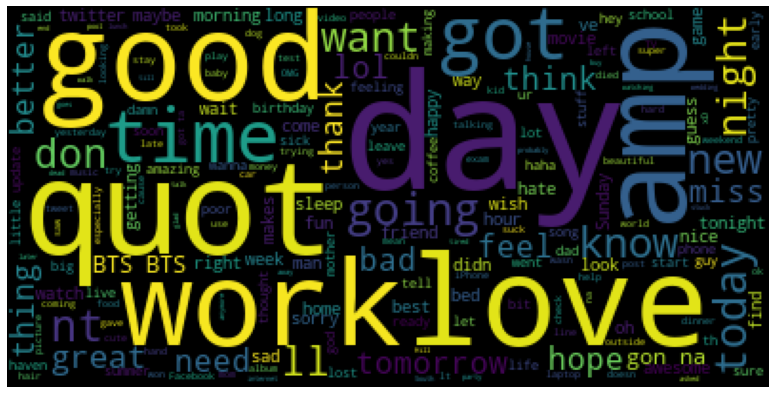

In [17]:
# Generating the Word Cloud Just for the Visualizations!
from wordcloud import WordCloud

all_text = ""
for sentence in cleaned_data:
    all_text += sentence


wc = WordCloud()
wc = wc.generate(all_text)
plt.figure(figsize = (15, 7))
plt.imshow(wc)
plt.axis("off")
plt.show()

## Using NLTK to classify the sentences

In [19]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/harshitdawar/nltk_data...


True

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [21]:
sentence_classifier = SentimentIntensityAnalyzer()

In [25]:
sentence_classifier.polarity_scores(cleaned_data[0])

{'neg': 0.164, 'neu': 0.395, 'pos': 0.441, 'compound': 0.4939}

In [28]:
import numpy as np
np.array(cleaned_data).shape, y.shape

((1600,), (1600,))

## Sentiment Analysis/Sentence Classification using RandomForest & TF-IDF

In [32]:
x_train, x_test, y_train, y_test  = train_test_split(np.array(cleaned_data), y, test_size = 0.25)

In [33]:
x_train.shape, y_train.shape

((1200,), (1200,))

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
vectorizer = TfidfVectorizer()

In [36]:
tfidf_sentences = vectorizer.fit_transform(x_train)

In [41]:
tfidf_sentences

<1200x3301 sparse matrix of type '<class 'numpy.float64'>'
	with 7473 stored elements in Compressed Sparse Row format>

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
classifier = RandomForestClassifier()
classifier.fit(tfidf_sentences, y_train)

RandomForestClassifier()

In [45]:
y_pred = classifier.predict(vectorizer.transform(x_test))

In [46]:
y_pred

array([4, 4, 0, 4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 4, 4, 0, 4, 0, 4,
       4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 4, 0, 4,
       4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 4, 0, 0, 0, 4,
       0, 4, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 4, 4,
       0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0,
       0, 0, 4, 0, 4, 0, 0, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 4, 4, 0,
       0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 4, 0, 4,
       0, 0, 0, 4, 0, 4, 0, 0, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 4, 0, 4,
       4, 0, 0, 0, 4, 4, 4, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4,
       4, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 4, 0, 4,
       0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 4, 0, 4, 4,
       4, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 4, 0, 0, 0, 4, 4,
       4, 0, 4, 4, 4, 0, 4, 0, 4, 0, 0, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0,

In [47]:
y_test

array([0, 0, 4, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 4, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0,
       0, 0, 4, 0, 4, 0, 4, 4, 4, 4, 0, 0, 4, 4, 0, 0, 4, 4, 0, 0, 0, 4,
       0, 4, 0, 0, 4, 4, 0, 4, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 4, 4, 0, 0,
       0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 0,
       4, 4, 4, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 0, 0,
       4, 4, 4, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0,
       4, 0, 4, 4, 0, 4, 4, 4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 4, 4, 4, 0, 4,
       4, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4, 4, 0, 0, 0, 4,
       4, 4, 0, 4, 0, 4, 4, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 4,
       4, 0, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 0, 4, 4, 4, 4,
       0, 0, 4, 0, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 0, 4, 0, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 0, 4,
       4, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test, y_pred)

0.635